<Axes: xlabel='Clasificacion'>

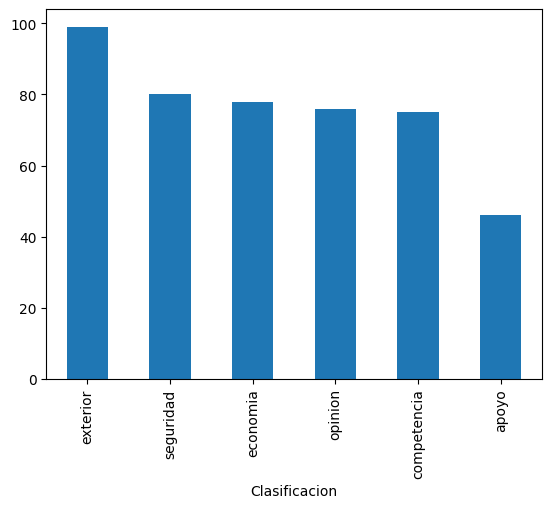

In [1]:
# file to experiment
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import spacy
from nltk.corpus import stopwords
from spacy.lang.es.examples import sentences

nlp = spacy.load("es_core_news_sm")
df = pd.read_csv("amlo.csv")
spanish_stopwords = stopwords.words("spanish")

# code to delete information that doesn't have enought words
# df = df[df["Texto"].str.split().str.len() >= 15 ]
# df.to_csv("amlo.csv", index=False)

# experiments
def text_processing(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-zÁáÉéÍíÓóÚúÜüÑñ \t])|(\w+:\/\/\S+)", "", text)
    text = nlp(text)
    lema = []
    for token in text:
        lema.append(token.lemma_)
    text = lema
    text = ' '.join(text)
    text = nlp(text).vector
    return text
def aaa(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-zÁáÉéÍíÓóÚúÜüÑñ \t])|(\w+:\/\/\S+)", "", text)
    text = nlp(text)
    lema = []
    for token in text:
        lema.append(token.lemma_)
    text = lema
    text = ' '.join(text)

    return text


df["vector"] = df["Texto"].apply(text_processing)
df["text_proc"] = df["Texto"].apply(aaa)


df['Clasificacion'].value_counts().plot(kind='bar')



In [2]:
df.head(10)
def clasification_to_num(text):
  if text == 'exterior':
    return 0
  elif text == 'economia':
    return 1
  elif text == 'opinion' :
    return 2
  elif text == 'competencia':
    return 3
  elif text == 'apoyo':
    return 4
  elif text == 'seguridad':
    return 5
  
df['cla_num'] = df['Clasificacion'].apply(clasification_to_num)
df.head(9)

df
  
  

,Texto,Clasificacion,vector,text_proc,cla_num
0,También vamos a informar este primer día hábil...,apoyo,"[0.79579973, 0.42409912, 0.19724745, -0.840587...",también ir a informar este primero día hábil d...,4
1,Y ahora se va a informar porque se está optand...,apoyo,"[0.6353484, 0.49206573, 0.27349722, -0.8813032...",y ahora él ir a informar porque él estar optar...,4
2,En esta etapa se combinan los bancos particula...,apoyo,"[0.3584754, 0.4897973, 0.14290081, -1.0719811,...",en este etapa él combinar el banco particular ...,4
3,"También Ariadna Montiel, que es la secretaria ...",apoyo,"[0.5383173, 0.47535262, 0.24838983, -0.7503995...",también ariadna montiel que ser el secretaria ...,4
4,Pero tenerlas terminadas no significa tenerlas...,apoyo,"[0.33861512, 0.8603513, 0.22871493, -0.8091768...",pero tenerla terminado no significar tenerlos ...,4
...,...,...,...,...,...
449,"Eso es lo que le puedo decir, con todo respeto...",exterior,"[0.08910938, 0.42923826, 0.11195223, -0.818825...",ese ser él que él poder decir con todo respeto...,0
450,Se va a llegar a concretar porque es que los ...,exterior,"[0.62809396, 0.23875064, 0.13055657, -1.398253...",él ir a llegar a concretar porque ser que el...,0
451,"Entonces, tenemos que hablar mucho con nuestro...",seguridad,"[0.5037492, 0.47401336, 0.49750805, -0.8337091...",entonces tener que hablar mucho con nuestro pa...,5
452,Es que ya lo están haciendo. Y a lo mejor el…...,exterior,"[0.6371676, 0.5459179, 0.19836979, -0.9584494,...",ser que ya él estar hacer y a él mejor el bu...,0


In [30]:

from nltk.util import ngrams
from nltk import word_tokenize
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from PIL import Image
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

X = df['vector']
X = np.concatenate(X,axis=0).reshape(-1,192)
X.shape
#43584

(227, 192)

In [31]:

model = TSNE(n_components=2, perplexity=30) # el preplexity es para que salga chido
resultado = model.fit_transform(X)
#get_ngrams(1, df[df['target_number'] == 'not-real-disaster']['clean_tweets'])new['tsne_1'] = resultado[:,0]
#new['tsne_2'] = resultado[:,1]




import plotly.express as px

fsne_result = pd.DataFrame({"tsne_1": resultado[:, 0], "tsne_2":resultado[:, 1]})
fsne_result["label"] = df["cla_num"]
fsne_result["text"] = df["text_proc"]
print(fsne_result.head())

fig = px.scatter(
    data_frame=fsne_result,
    x=fsne_result["tsne_1"],
    y=fsne_result["tsne_2"],
    color=fsne_result["label"],
    template="plotly_dark",
    hover_data=["text"],
)

fig.show()

     tsne_1    tsne_2  label  \
0 -0.488100 -0.457282      4   
1 -3.167167  2.505589      4   
2 -0.274924 -1.345065      4   
3 -0.041461 -1.066394      4   
4 -0.548837  0.314880      4   

                                                text  
0  también ir a informar este primero día hábil d...  
1  y ahora él ir a informar porque él estar optar...  
2  en este etapa él combinar el banco particular ...  
3  también ariadna montiel que ser el secretaria ...  
4  pero tenerla terminado no significar tenerlos ...  
